<a href="https://colab.research.google.com/github/roshan1960701/StreamSense-Netflix-Insights-Hub/blob/main/CA2_DataMining(Netflix).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=4a29baaacdbb162d2daa3dbf4f978b825a21df053aee3b13abdc4e808710ff00
  Stored in directory: /root/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55509 sha256=64a6ede331f061b98671a87556e190db3d0b25c69b78833b77962ae4e319e512
  Stored in directory: /root/.cache/pip/wheels/b9/89/cc/59ab91ef5b21dc2ab3635528d7d227f49dfc9169905dcb959d
Successfully built umap-learn pynndescent


In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import missingno as msno
from sklearn.feature_extraction.text import CountVectorizer

from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import umap
import plotly.graph_objs as go
import plotly.figure_factory as ff


from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder


from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer

from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

## Reading Raw Dataset from Gdrive

In [ ]:
rawDataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining/n_movies.csv")

In [ ]:
rawDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9150 entries, 0 to 9149
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_ID      9150 non-null   int64  
 1   title         9150 non-null   object 
 2   year          9150 non-null   int64  
 3   certificate   9150 non-null   object 
 4   duration_min  9150 non-null   int64  
 5   genre         9150 non-null   object 
 6   Tag           9150 non-null   object 
 7   rating        9150 non-null   float64
 8   description   9150 non-null   object 
 9   stars         9150 non-null   object 
 10  votes         9150 non-null   object 
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

### Data cleaning

In [ ]:
rawDataset.isna().sum()

movie_ID           0
title              0
year               0
certificate        0
duration_min       0
genre              0
Tag                0
rating             0
description        0
stars              0
votes              0
Unnamed: 11     9150
Unnamed: 12     9150
Unnamed: 13     9150
Unnamed: 14     9150
Unnamed: 15     9150
Unnamed: 16     9150
Unnamed: 17     9150
Unnamed: 18     9150
Unnamed: 19     9150
Unnamed: 20     9150
Unnamed: 21     9150
Unnamed: 22     9150
Unnamed: 23     9150
Unnamed: 24     9150
Unnamed: 25     9150
Unnamed: 26     9150
Unnamed: 27     9150
Unnamed: 28     9150
Unnamed: 29     9150
Unnamed: 30     9150
Unnamed: 31     9150
Unnamed: 32     9150
Unnamed: 33     9150
Unnamed: 34     9150
Unnamed: 35     9150
Unnamed: 36     9150
dtype: int64

As we can see that unnamed columns are present in our dataset which are all having null values. So make a balance of all column we need to remove all unnamed columns from dataset

In [ ]:
# Dataset contains severals unnmaed column
# str.contains() is used to find perticular column in dataset and  loc used to access group of column
rawDataset = rawDataset.loc[:, ~rawDataset.columns.str.contains('^Unnamed')]
rawDataset = rawDataset.dropna()

In [ ]:
rawDataset.isna().sum()

movie_ID        0
title           0
year            0
certificate     0
duration_min    0
genre           0
Tag             0
rating          0
description     0
stars           0
votes           0
dtype: int64

In [ ]:
sum(rawDataset.duplicated())

0

## Exporting Cleaned Dataset into Gdrive

In [ ]:
rawDataset.to_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining/NetflixCleanedDataset.csv',index=None)

## Data Exploration

In [ ]:
netflixDataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining/NetflixCleanedDataset.csv")

In [ ]:
netflixDataset.head(5)

,movie_ID,title,year,certificate,duration_min,genre,Tag,rating,description,stars,votes
0,1,Cobra Kai,2018,TV-14,30,Action,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio','William Zabka','Courtney Hen...","177,031"
1,2,The Crown,2016,TV-MA,58,Biography,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy','Olivia Colman','Imelda Staunton...","199,885"
2,3,Better Call Saul,2022,TV-MA,46,Crime,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk','Rhea Seehorn','Jonathan Banks...","501,384"
3,4,Devil in Ohio,2022,TV-MA,356,Drama,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel','Sam Jaeger','Gerardo Celas...","9,773"
4,5,Cyberpunk: Edgerunners,2022,TV-MA,24,Animation,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar','Kenichiro Ohashi','Emi Lo','A...","15,413"


**VARIABLES ANALYSIS**

movie_ID - Numeric

title - Nominal

year - Integer

certificate - Polynomial

duration_min - Integer

genre - Polynomial

Tag - Nominal

rating - Real

description - Nominal

stars - Nominal

votes -  Numeric



## Data Preparation

In [ ]:
print('Total No of genre:',len(Counter(netflixDataset['genre'])))
print(Counter(netflixDataset['genre']))

Total No of genre: 26
Counter({'Comedy': 1998, 'Drama': 1583, 'Animation': 1297, 'Documentary': 1273, 'Action': 1113, 'Crime': 652, 'Adventure': 290, 'Biography': 177, 'Reality-TV': 173, 'Horror': 155, 'Short': 87, 'Family': 59, 'Thriller': 53, 'Game-Show': 53, 'Romance': 38, 'Music': 33, 'Mystery': 28, 'Fantasy': 26, 'Talk-Show': 25, 'Sci-Fi': 10, 'Western': 7, 'Sport': 6, 'News': 6, 'History': 4, 'Musical': 3, 'Film-Noir': 1})


In [ ]:
print('Total No of certificate:',len(Counter(netflixDataset['certificate'])))
print(Counter(netflixDataset['certificate']))

Total No of certificate: 20
Counter({'Unrated': 2806, 'TV-MA': 2485, 'TV-14': 1179, 'TV-PG': 540, 'R': 471, 'Not Rated': 467, 'TV-Y7': 338, 'PG-13': 282, 'TV-Y': 168, 'PG': 159, 'TV-G': 142, 'G': 42, 'TV-Y7-FV': 31, 'Approved': 26, 'Passed': 6, 'NC-17': 4, 'MA-17': 1, '12': 1, 'M': 1, 'E10+': 1})


In [ ]:
print('Total No of Tag:',len(Counter(netflixDataset['Tag'])))
print(Counter(netflixDataset['Tag']))

Total No of Tag: 561
Counter({'Comedy': 797, 'Animation, Action, Adventure': 527, 'Drama': 508, 'Documentary': 474, 'Comedy, Drama': 278, 'Crime, Drama, Mystery': 245, 'Drama, Romance': 234, 'Comedy, Drama, Romance': 203, 'Action, Crime, Drama': 169, 'Reality-TV': 164, 'Comedy, Romance': 162, 'Animation, Adventure, Comedy': 146, 'Action, Adventure, Drama': 134, 'Crime, Drama, Thriller': 129, 'Comedy, Crime, Drama': 111, 'Documentary, Crime': 108, 'Documentary, Comedy': 96, 'Drama, History': 95, 'Adventure, Comedy, Reality-TV': 92, 'Drama, Thriller': 85, 'Crime, Drama': 82, 'Action, Adventure, Comedy': 82, 'Documentary, Short': 78, 'Drama, Fantasy, Horror': 75, 'Drama, Horror, Mystery': 73, 'Action, Crime, Thriller': 73, 'Drama, Mystery, Thriller': 68, 'Animation, Comedy, Drama': 59, 'Action, Comedy, Drama': 56, 'Horror': 56, 'Animation, Short, Adventure': 55, 'Animation, Comedy, Family': 54, 'Thriller': 53, 'Action, Thriller': 47, 'Animation, Action, Comedy': 47, 'Crime, Drama, Fantasy

In [ ]:
# Converting rating float value to int
netflixDataset['rating'] = netflixDataset['rating'].astype(int)

In [ ]:
# Converting votes into numeric format and removing quotes('') and comma(,) from it
def convert_to_int(s):
    return int(s.replace(',', ''))

netflixDataset['votes'] = netflixDataset['votes'].apply(convert_to_int)


In [ ]:
# function to convert categorical data into numeric format .
def fillUp(data):
  l = {}
  n = 1
  for i in data:
    l[i] = n
    n = n+1
  return l

In [ ]:
genre = fillUp(pd.DataFrame(netflixDataset['genre'].value_counts()).index)
certificate = fillUp(pd.DataFrame(netflixDataset['certificate'].value_counts()).index)
tag = fillUp(pd.DataFrame(netflixDataset['Tag'].value_counts()).index)

In [ ]:
df1 = netflixDataset.replace({'genre':genre})
df2 = df1.replace({'Tag':tag})
df = df2.replace({'certificate':certificate})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9150 entries, 0 to 9149
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie_ID      9150 non-null   int64 
 1   title         9150 non-null   object
 2   year          9150 non-null   int64 
 3   certificate   9150 non-null   int64 
 4   duration_min  9150 non-null   int64 
 5   genre         9150 non-null   int64 
 6   Tag           9150 non-null   int64 
 7   rating        9150 non-null   int64 
 8   description   9150 non-null   object
 9   stars         9150 non-null   object
 10  votes         9150 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 786.5+ KB


<Axes: >

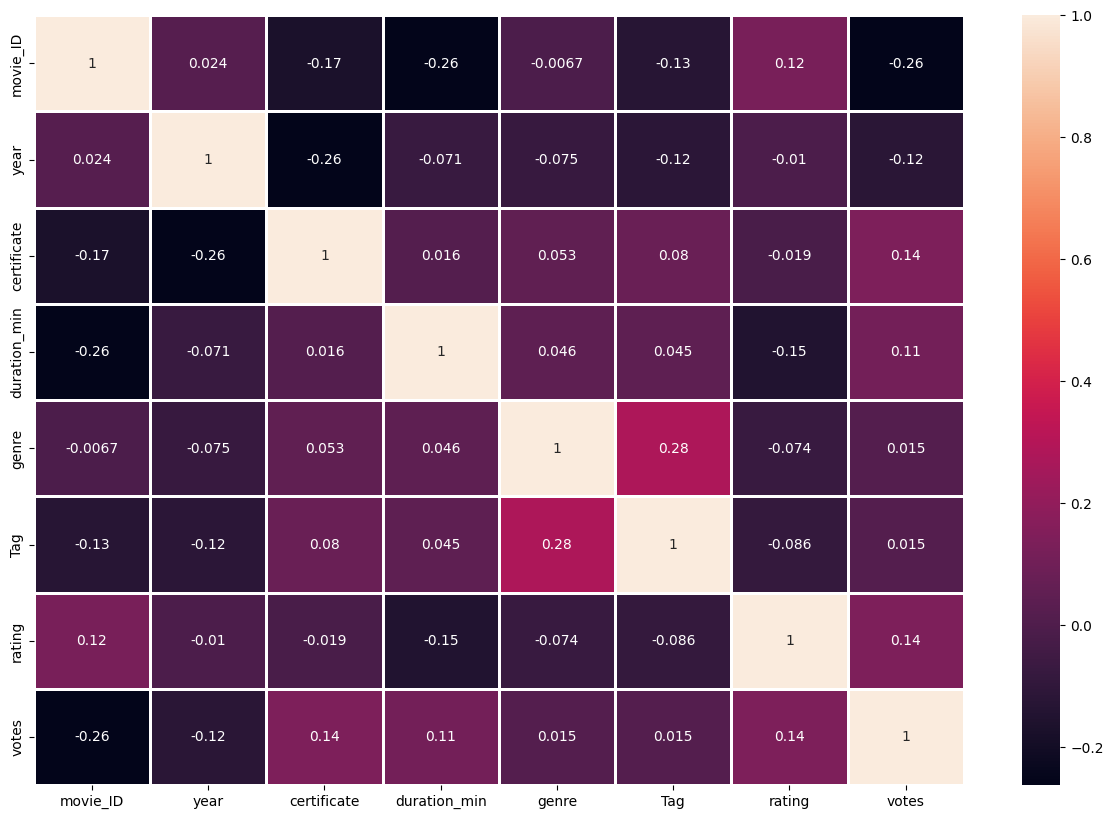

In [ ]:
plt.subplots(figsize=(15,10))
corrs = df.corr()
map1 = sns.heatmap(corrs, annot=True, linewidth=1)#, cmap='coolwarm')
map1

`Heatmap depicts that movie_ID variable is less correlated with votes.`

## Predicting genre of the movies

In [ ]:
X = df.drop(columns=['title','description','stars','genre','movie_ID'])
Y = df['genre']

### Random Forest Classification

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=101)

# Create a Random Forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=101)

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rfc.predict(X_test)

# Calculate the accuracy score
accuracy = rfc.score(X_test, y_test)
print("Accuracy:", accuracy)
print(classification_report(y_test,y_pred))

Accuracy: 0.7604895104895105
              precision    recall  f1-score   support

           1       0.85      0.83      0.84       499
           2       0.78      0.81      0.79       410
           3       0.83      0.89      0.86       324
           4       0.75      0.83      0.79       324
           5       0.60      0.73      0.66       281
           6       0.78      0.64      0.71       163
           7       0.72      0.54      0.62        61
           8       0.43      0.27      0.33        48
           9       0.94      0.85      0.89        39
          10       0.62      0.39      0.48        38
          11       0.78      0.41      0.54        17
          12       0.67      0.40      0.50        15
          13       0.38      0.25      0.30        12
          14       0.75      0.25      0.38        12
          15       0.50      0.21      0.30        14
          16       0.50      0.60      0.55         5
          17       0.00      0.00      0.00         

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=101)

# Create a Random Forest classifier
rfc = RandomForestClassifier(random_state=101)

# Set the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rfc, param_grid, cv=5)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Make predictions on the test data
y_pred = grid_search.predict(X_test)

# Calculate the accuracy score
accuracy = grid_search.score(X_test, y_test)
print("Accuracy:", accuracy)

# Print the best parameters found by GridSearchCV
print("Best parameters:", grid_search.best_params_)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.7596153846153846
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


### Gradient Boosting Classifier

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=101)

# Create a Gradient Boosting classifier
gbc = GradientBoostingClassifier(random_state=101)

# Fit the model to the training data
gbc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbc.predict(X_test)

# Calculate the accuracy score
accuracy = gbc.score(X_test, y_test)
print("Accuracy:", accuracy)
print(classification_report(y_test,y_pred))

Accuracy: 0.9187062937062938
              precision    recall  f1-score   support

           1       0.97      0.93      0.95       499
           2       0.95      0.91      0.93       410
           3       0.95      0.92      0.93       324
           4       0.85      0.94      0.89       324
           5       0.83      0.93      0.88       281
           6       0.98      0.94      0.96       163
           7       0.89      0.82      0.85        61
           8       0.95      0.83      0.89        48
           9       1.00      1.00      1.00        39
          10       0.94      0.84      0.89        38
          11       0.69      0.53      0.60        17
          12       0.86      0.80      0.83        15
          13       1.00      0.92      0.96        12
          14       1.00      1.00      1.00        12
          15       0.81      0.93      0.87        14
          16       1.00      1.00      1.00         5
          17       0.75      1.00      0.86         

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=101)

# Create a Gradient Boosting classifier
gbc = GradientBoostingClassifier(random_state=101)

# Set the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate': [0.01, 0.1, 1]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(gbc, param_grid, cv=5)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Make predictions on the test data
y_pred = grid_search.predict(X_test)

# Calculate the accuracy score
accuracy = grid_search.score(X_test, y_test)
print("Accuracy:", accuracy)

# Print the best parameters found by GridSearchCV
print("Best parameters:", grid_search.best_params_)

### Visualisation of genre

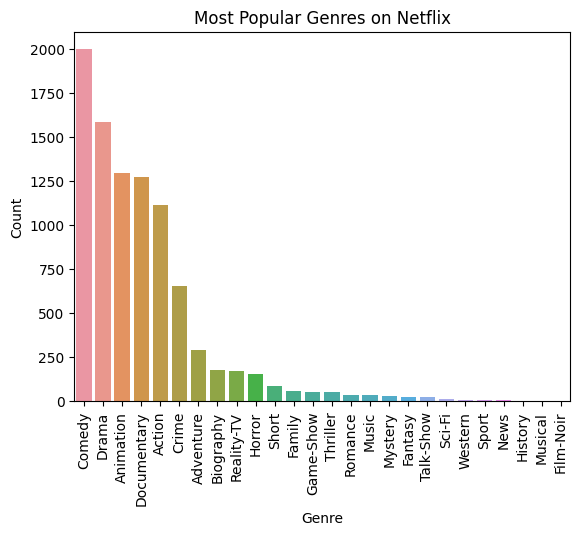

In [ ]:
# Which genres are the most popular among Netflix viewers?
dfSet = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining/NetflixCleanedDataset.csv")

genre_counts = dfSet['genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts)
plt.xticks(rotation=90)
plt.title("Most Popular Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

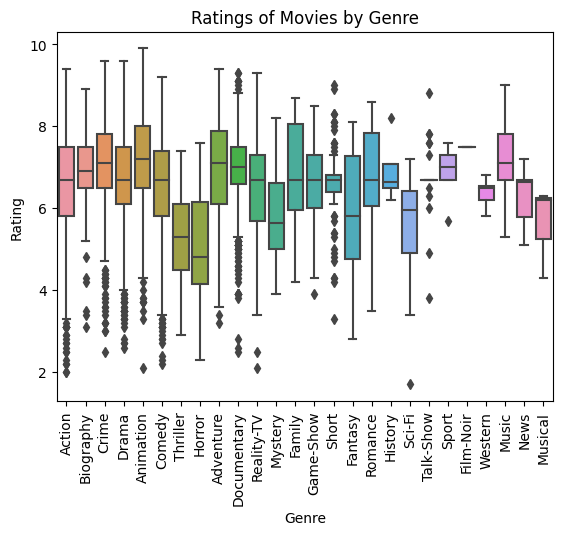

In [ ]:
# Which genres tend to have higher ratings than others on Netflix?
sns.boxplot(x="genre", y="rating", data=dfSet)
plt.xticks(rotation=90)
plt.title("Ratings of Movies by Genre")
plt.xlabel("Genre")
plt.ylabel("Rating")
plt.show()

## UML findings of Subcluseter in genre
Identifying clusters of movies that have similar characteristics based on their ratings and other features.

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining/NetflixCleanedDataset.csv")
pd.set_option('display.max_colwidth', None) # Setting this so we can see the full content of cells
pd.set_option('display.max_columns', None) # to make sure we can see all the columns in output window
dataset['genre'] = dataset['genre'].map({'Action': 0,'Biography': 1,'Crime': 2,'Drama': 3,'Animation': 4,'Comedy': 5,'Thriller': 6,'Horror': 7,'Adventure': 8,'Documentary': 9,'Reality-TV': 10,'Mystery': 11,'Family': 12,'Game-Show': 13,'Short': 14,'Fantasy': 15,'Romance': 16,'History': 17,'Sci-Fi': 18,'Talk-Show': 19,'Sport': 20,'Film-Noir': 21,'Western': 22,'Music': 23,'News': 24,'Musical': 25})

In [ ]:
# Cleaning news summaries
def cleaner(description):
    soup = BeautifulSoup(description, 'lxml') # removing HTML entities such as ‘&amp’,’&quot’,'&gt'; lxml is the html parser and shoulp be installed using 'pip install lxml'
    souped = soup.get_text()
    re1 = re.sub("[^A-Za-z]+"," ", souped) # substituting any non-alphabetic character that repeats one or more times with whitespace

    """
    For more info on regular expressions visit -
    https://docs.python.org/3/howto/regex.html
    """

    tokens = nltk.word_tokenize(re1)
    lower_case = [t.lower() for t in tokens]

    stop_words = set(stopwords.words('english'))
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case))

    wordnet_lemmatizer = WordNetLemmatizer()
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result]
    return lemmas

dataset['cleaned_description'] = dataset.description.apply(cleaner)
dataset = dataset[dataset['cleaned_description'].map(len) > 0] # removing rows of length 0 (if any)
print("Printing top 5 rows of dataframe showing original and cleaned description....")
print(dataset[['description','cleaned_description']].head())
dataset['cleaned_description'] = [" ".join(row) for row in dataset['cleaned_description'].values] # joining tokens to create strings. TfidfVectorizer does not accept tokens as input
data = dataset['cleaned_description']
tfidf = TfidfVectorizer(min_df=.0005, ngram_range=(1,3)) # min_df=.0005 means that each ngram (unigram, bigram, & trigram) must be present in at least 30 documents for it to be considered as a token (60000*.0005=30). This is a clever way of feature engineering
tfidf.fit(data) # learn vocabulary of entire data
data_tfidf = tfidf.transform(data) # creating tfidf values
print(tfidf.get_feature_names_out())
print("Shape of tfidf matrix: ", data_tfidf.shape)


<ipython-input-139-c28e6ca06f1c>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(description, 'lxml') # removing HTML entities such as ‘&amp’,’&quot’,'&gt'; lxml is the html parser and shoulp be installed using 'pip install lxml'


Printing top 5 rows of dataframe showing original and cleaned description....
                                                                                                                                                                                                                      description  \
0                                                                         Decades after their 1984 All Valley Karate Tournament bout, a middle-aged Daniel LaRusso and Johnny Lawrence find themselves martial-arts rivals again.   
1                                                                                  Follows the political rivalries and romance of Queen Elizabeth II's reign and the events that shaped the second half of the twentieth century.   
2                                                                                                      The trials and tribulations of criminal lawyer Jimmy McGill before his fateful run-in with Walter White and Jesse Pinkman.   
3     

In [ ]:
# Implementing UMAP to visualize dataset
u = umap.UMAP(n_components=2, n_neighbors=30, min_dist=0.4)
x_umap = u.fit_transform(data_tfidf)

genre = list(dataset['genre'])
description = list(dataset['description'])

data_ = [go.Scatter(x=x_umap[:,0], y=x_umap[:,1], mode='markers',
                    marker = dict(color=dataset['genre'], colorscale='Rainbow', opacity=0.5),
                                text=[f'genre: {a}<br>description: {b}' for a,b in list(zip(genre, description))],
                                hoverinfo='text')]

layout = go.Layout(title = 'UMAP Dimensionality Reduction', width = 1400, height = 1400,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data_, layout=layout)
fig.show()

## Movies recommendation based on ratings and description

In [ ]:
netFlxDts = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining/NetflixCleanedDataset.csv")
netFlxDts.head(10)

,movie_ID,title,year,certificate,duration_min,genre,Tag,rating,description,stars,votes
0,1,Cobra Kai,2018,TV-14,30,Action,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio','William Zabka','Courtney Hen...","177,031"
1,2,The Crown,2016,TV-MA,58,Biography,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy','Olivia Colman','Imelda Staunton...","199,885"
2,3,Better Call Saul,2022,TV-MA,46,Crime,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk','Rhea Seehorn','Jonathan Banks...","501,384"
3,4,Devil in Ohio,2022,TV-MA,356,Drama,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel','Sam Jaeger','Gerardo Celas...","9,773"
4,5,Cyberpunk: Edgerunners,2022,TV-MA,24,Animation,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar','Kenichiro Ohashi','Emi Lo','A...","15,413"
5,6,The Sandman,2022,TV-MA,45,Drama,"Drama, Fantasy, Horror",7.8,Upon escaping after decades of imprisonment by...,"['Tom Sturridge','Boyd Holbrook','Patton Oswal...","116,358"
6,7,Rick and Morty,2013,TV-MA,23,Animation,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"['Justin Roiland','Chris Parnell','Spencer Gra...","502,160"
7,8,Breaking Bad,2013,TV-MA,49,Crime,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,"['Bryan Cranston','Aaron Paul','Anna Gunn','Be...","1,831,340"
8,9,The Imperfects,2022,TV-MA,45,Action,"Action, Adventure, Drama",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell','Italia Ricci','Rhia...","3,123"
9,10,Blonde,2022,NC-17,166,Biography,"Biography, Drama, Mystery",6.2,A fictionalized chronicle of the inner life of...,"['Andrew Dominik','Ana de Armas','Lucy DeVito'...",935


In [ ]:
# Droping rows with missing values in the 'description' and 'rating' columns
netFlxDts = netFlxDts.dropna(subset=['description', 'rating'])

In [ ]:
# Create a TF-IDF vectorizer to convert movie descriptions to vectors
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(netFlxDts['description'])

- TfidVectorizer is used to compare the repetation of words in perticular documnets. In our code, it is being consumed to utilize the description.

- fit_transform method converts the movie descriptions in the DataFrame into a TF-IDF matrix. Each row of the matrix represents a movie, and each column represents a unique word in the descriptions.

In [ ]:
## Remove duplicate values based on titles
netFlxDts = netFlxDts.drop_duplicates(subset=['title'])

In [ ]:
# Compute the cosine similarity matrix based on movie descriptions
cosine_sim = cosine_similarity(tfidf_matrix)

- Cosine Similarity is using to check the simmilarity between others tfid matrix. Based on the simmilarity we can get the movies recommendation.

- The cosine similarity between two vectors is the cosine of the angle between them in a multidimensional space. It is a measure of the similarity between the two vectors, ranging from -1 (opposite directions) to 1 (same direction), with 0 indicating no correlation between the vectors.

In [ ]:

# Create a dictionary to store the movie titles and their corresponding indices in the DataFrame
indices = pd.Series(netFlxDts.index, index=netFlxDts['title']).drop_duplicates()


This line constructs a reverse mapping of movie titles and indices. The resulting indices Series object has movie titles as its index and movie indices as its values. This mapping will be used later to look up the index of a movie given its title.

In [ ]:
def get_recommendations(title):
    # Get all the indices of the movies that match the title
    indices = netFlxDts.index[netFlxDts['title'] == title].tolist()

    # Get the pairwise similarity scores for all movies with those indices
    sim_scores = []
    for idx in indices:
        sim_scores += list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the top 10 most similar movies
    movie_indices = [i[0] for i in sim_scores[1:11] if i[0] < len(netFlxDts)]

    # Return the top 10 most similar movies
    return netFlxDts.sort_values(['rating', 'title'], ascending=[False, True]).head(10)

In [ ]:
recommended_movies = get_recommendations('Breaking Bad')
recommended_movies

,movie_ID,title,year,certificate,duration_min,genre,Tag,rating,description,stars,votes
17,18,1899,2022,Unrated,60,Drama,"Drama, History, Horror",9.6,Multinational immigrants traveling from the old continent to the new encounter a nightmarish riddle aboard a second ship adrift on the open sea.,"['Ben Ashenden','Aneurin Barnard','Emily Beecham','Anton Lesser']",853
7,8,Breaking Bad,2013,TV-MA,49,Crime,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with inoperable lung cancer turns to manufacturing and selling methamphetamine in order to secure his family's future.,"['Bryan Cranston','Aaron Paul','Anna Gunn','Betsy Brandt']","1,831,340"
3220,3230,Elesin Oba: The King's Horseman,2022,Unrated,96,Adventure,"Adventure, Drama, History",9.4,"Inspired by true life events, in the Oyo Empire in the 1940's, Elesin Oba, the king's chief horseman, succumbs to the lure of beauty and sexual desire on the very evening he is set to die ... See full summary »","['Biyi Bandele','Odunlade Adekola','Shaffy Bello','Olawale-Brymo Olofooro','Deyemi Okanlawon']",72
4638,4664,Story Time Book: Read-Along,2022,Unrated,70,Animation,Animation,9.4,"Kids can read along with illustrated books that come to life through animation, music and narration. Exciting adventures, fuzzy animal friends and more.","['Lileina Joy','Maya Aoki Tuttle','Emily Wold','Lucy Capri']",16
192,194,Avatar: The Last Airbender,2008,TV-Y7-FV,23,Animation,"Animation, Action, Adventure",9.3,"In a war-torn world of elemental magic, a young boy reawakens to undertake a dangerous mystic quest to fulfill his destiny as the Avatar, and bring peace to the world.","['Dee Bradley Baker','Zach Tyler Eisen','Mae Whitman','Jack De Sena']","309,241"
781,784,Cosmos: A Spacetime Odyssey,2014,TV-PG,557,Documentary,Documentary,9.3,An exploration of our discovery of the laws of nature and coordinates in space and time.,"['Neil deGrasse Tyson','Christopher Emerson','Keythe Farley','Piotr Michael']","121,400"
1388,1392,Our Planet,2019,TV-G,403,Documentary,Documentary,9.3,"Documentary series focusing on the breadth of the diversity of habitats around the world, from the remote Arctic wilderness and mysterious deep oceans to the vast landscapes of Africa and diverse jungles of South America.",['David Attenborough'],"43,175"
1193,1197,Reply 1988,2016,Unrated,90,Comedy,"Comedy, Drama, Family",9.2,Follows the lives of 5 families living on the same street in a neighbourhood called Ssangmundong in Seoul. It takes a nostalgic look back at the year 1988.,"['Hyeri Lee','Go Kyung-Pyo','Ryu Jun-Yeol','Park Bo-gum']","7,286"
6,7,Rick and Morty,2013,TV-MA,23,Animation,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits of a super scientist and his not-so-bright grandson.,"['Justin Roiland','Chris Parnell','Spencer Grammer','Sarah Chalke']","502,160"
4340,4364,CM101MMXI Fundamentals,2013,Unrated,139,Documentary,"Documentary, Comedy",9.1,The funny little details of everyday life; the simple things that makes us laugh. An unforgettable performance from Cem Yilmaz. Yilmaz captures the audience with his hilarious stories about... See full summary »,"['Murat Dündar','Cem Yilmaz']","46,282"


## Sentimental analysis of movies based on description of movies

In [ ]:
# Create a new column for sentiment scores and smileys
netFlxDts['sentiment_score'] = 0
netFlxDts['sentiments'] = ''

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each description
for i, row in netFlxDts.iterrows():
    description = row['description']
    #polarity_scores() method of the SentimentIntensityAnalyzer class to analyze the sentiment of a given text
    sentiment_score = sid.polarity_scores(description)
    netFlxDts.at[i, 'sentiment_score'] = sentiment_score['compound']

    # Determine the smiley based on the sentiment score
    if sentiment_score['compound'] > 0.5:
        netFlxDts.at[i, 'smiley'] = '😊'
    elif sentiment_score['compound'] > 0:
        netFlxDts.at[i, 'smiley'] = '🙂'
    elif sentiment_score['compound'] > -0.5:
        netFlxDts.at[i, 'smiley'] = '😐'
    else:
        netFlxDts.at[i, 'smiley'] = '🙁'

# Display the first 10 rows of the dataset with the sentiment scores and smileys
netFlxDts[['title', 'rating', 'votes', 'description', 'sentiment_score', 'sentiments']].head(10)

,title,rating,votes,description,sentiment_score,sentiments
0,Cobra Kai,8.5,"177,031",Decades after their 1984 All Valley Karate Tou...,0.0000,
1,The Crown,8.7,"199,885",Follows the political rivalries and romance of...,0.5574,
2,Better Call Saul,8.9,"501,384",The trials and tribulations of criminal lawyer...,-0.5267,
3,Devil in Ohio,5.9,"9,773",When a psychiatrist shelters a mysterious cult...,-0.3818,
4,Cyberpunk: Edgerunners,8.6,"15,413",A Street Kid trying to survive in a technology...,-0.0258,
5,The Sandman,7.8,"116,358",Upon escaping after decades of imprisonment by...,0.3818,
6,Rick and Morty,9.2,"502,160",An animated series that follows the exploits o...,0.3612,
7,Breaking Bad,9.5,"1,831,340",A high school chemistry teacher diagnosed with...,-0.4588,
8,The Imperfects,6.3,"3,123",After an experimental gene therapy turns them ...,0.3182,
9,Blonde,6.2,935,A fictionalized chronicle of the inner life of...,0.0000,



polarity_scores funcaiton is being consumed to predict sentiments score based on provided text

The sentiment score is a number between -1 and 1, where -1 represents negative sentiment, 0 represents neutral sentiment, and 1 represents positive sentiment

## Wordcloud of genre of  Netflix

(-0.5, 1599.5, 599.5, -0.5)

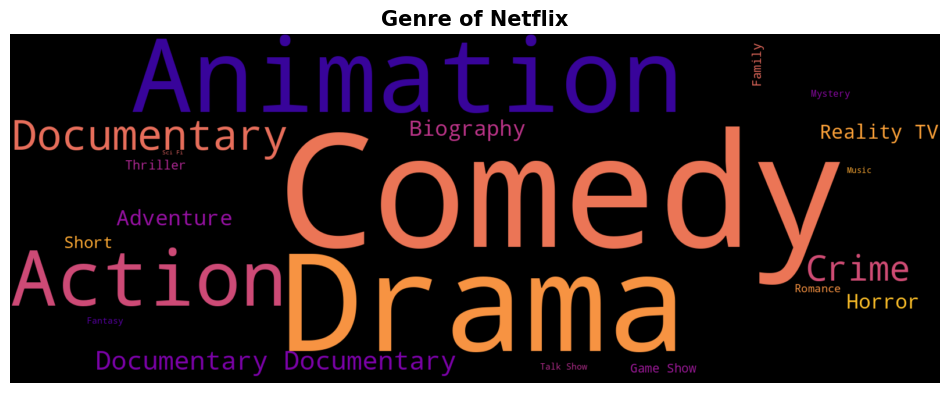

In [ ]:
plt.figure(figsize=(12,12))
wc = WordCloud(max_words=1000,
               min_font_size=10,
               height=600,
               width=1600,
               background_color='black',
               contour_color='black',
               colormap='plasma',
               repeat=False,
               stopwords=STOPWORDS).generate(' '.join(netFlxDts['genre']))

plt.title("Genre of Netflix", size=15, weight='bold')
plt.imshow(wc, interpolation= "bilinear")
plt.axis('off')

## Questions
- Predicting the genre of movies based on their rating, votes, and release year. If the features are good enough to predict genre

- Creating a recommender system that suggests movies to users based on their past viewing history.

- Predicting Collaboration between actors based on previews collaboration

- Predict the reqaction of viewers based on the decription of movies

### Refenreces

- https://sites.temple.edu/tudsc/2017/03/30/measuring-similarity-between-texts-in-python/#:~:text=The%20cosine%20similarity%20is%20the,the%20similarity%20between%20two%20documents.

- https://www.analyticsvidhya.com/blog/2021/09/gradient-boosting-algorithm-a-complete-guide-for-beginners/